# Annotation plots - embedding and dotplots

In [1]:
import scanpy as sc
import pandas as pd

In [2]:
# figure directory
fig_path = '/home/jovyan/mount/gdrive/Pan_fetal/plots_output/chenqu_jhub/'
sc.settings.figdir = fig_path

In [9]:
#sc.settings.figdir ='/home/jovyan/panfetal/figures/'

## Plot marker dotplots

### Load data

In [3]:
adata = sc.read_h5ad("/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.20210429.h5ad")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
adata.var_names_make_unique()
adata.raw = adata.copy()

In [5]:
obs = pd.read_csv('/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv', index_col = 0) # final annotations and removed maternal contaminant cells

/home/jovyan/my-conda-envs/skeleton/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
adata = adata[adata.obs_names.isin(obs.index)].copy()

In [7]:
for col in obs:
    adata.obs[col] = obs[col] # use anno_lvl_2_final_clean

In [8]:
adata.obs['anno_lvl_2_final_clean'] = adata.obs['anno_lvl_2_final_clean'].astype('category')

### B cell marker gene plot

In [12]:
Bcell = adata[adata.obs['anno_lvl_2_final_clean'].isin(['LMPP_MLP','PRE_PRO_B','PRO_B','LATE_PRO_B','LARGE_PRE_B','SMALL_PRE_B','IMMATURE_B',
                                            'MATURE_B','CYCLING_B','B1','PLASMA_B'])]

In [13]:
Bcell.obs['anno_lvl_2_final_clean'] = Bcell.obs['anno_lvl_2_final_clean'].cat.reorder_categories(['LMPP_MLP','PRE_PRO_B','PRO_B','LATE_PRO_B','LARGE_PRE_B','SMALL_PRE_B','IMMATURE_B',
                                            'MATURE_B','B1','PLASMA_B','CYCLING_B'])

Trying to set attribute `.obs` of view, copying.


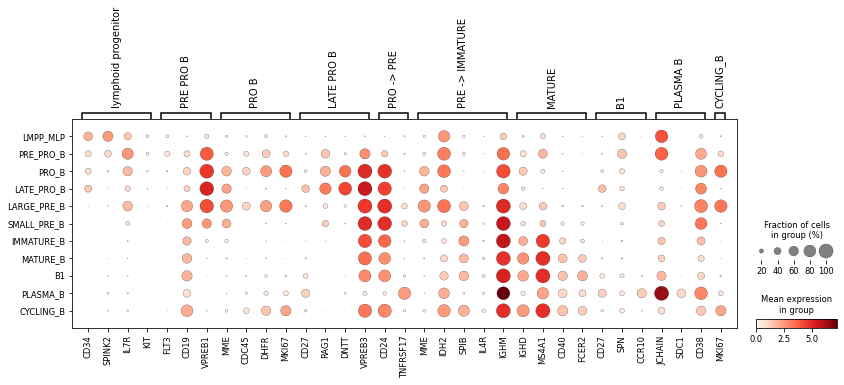

In [51]:
markers = {'lymphoid progenitor':['CD34','SPINK2','IL7R','KIT'],
           'PRE PRO B':['FLT3','CD19','VPREB1'], 
           'PRO B':['MME','CDC45','DHFR','MKI67'], 
           'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 
           'PRO -> PRE':['CD24','TNFRSF17'], 
           'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R','IGHM'], 
           'MATURE':['IGHD','MS4A1','CD40','FCER2'], 
           'B1':['CD27','SPN','CCR10'],
           'PLASMA B':['JCHAIN','SDC1','CD38'],
           'CYCLING_B':['MKI67']
          }
sc.pl.dotplot(Bcell, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=True, save='B_anno.pdf')

### NKT/ILC marker genes

In [16]:
Tcell = adata[adata.obs['anno_lvl_2_final_clean'].isin(['DN(early)_T','DN(P)_T','DN(Q)_T','DP(P)_T','DP(Q)_T','ABT(ENTRY)','CD8+T',
                                                                          'CD4+T','TREG','CYCLING_T','CD8AA','TYPE_3_INNATE_T','ILC3','ILC2','CYCLING_ILC',
                                                                          'TYPE_1_INNATE_T','NK','CYCLING_NK'])]

In [17]:
Tcell.obs['anno_lvl_2_final_clean'] = Tcell.obs['anno_lvl_2_final_clean'].cat.reorder_categories(['DN(early)_T','DN(P)_T','DN(Q)_T','DP(P)_T','DP(Q)_T','ABT(ENTRY)','CD8+T',
                                                                          'CD4+T','TREG','CYCLING_T','CD8AA','TYPE_3_INNATE_T','ILC3','ILC2','CYCLING_ILC',
                                                                          'TYPE_1_INNATE_T','NK','CYCLING_NK'])

Trying to set attribute `.obs` of view, copying.


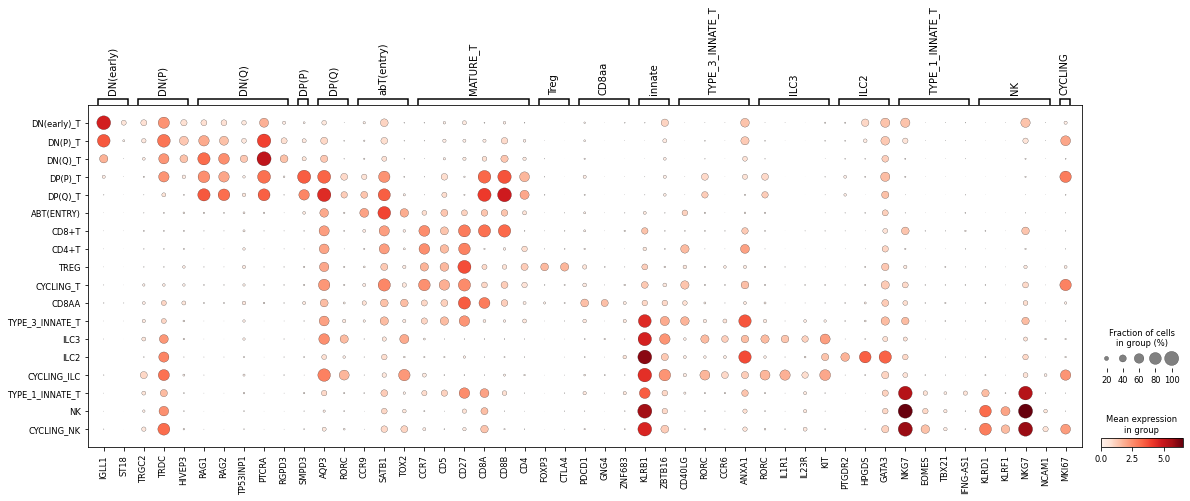

In [50]:
markers = {'DN(early)':['IGLL1','ST18'],
           'DN(P)':['TRGC2','TRDC','HIVEP3'],
           'DN(Q)':['RAG1','RAG2','TP53INP1','PTCRA','RGPD3'],
           'DP(P)':['SMPD3'], 
           'DP(Q)':['AQP3','RORC'], 
           'abT(entry)':['CCR9','SATB1','TOX2'], 
           'MATURE_T':['CCR7','CD5','CD27','CD8A','CD8B','CD4'], 
           #'agonist selection':['TNFRSF9','CD27','IKZF2','IKZF3'],
           'Treg':['FOXP3','CTLA4'], 
           'CD8aa':['PDCD1','GNG4','ZNF683'], 
           'innate':['KLRB1','ZBTB16'],
           'TYPE_3_INNATE_T':['CD40LG','RORC','CCR6','ANXA1'],
           'ILC3': ['RORC','IL1R1','IL23R','KIT'],
           'ILC2':['PTGDR2','HPGDS','GATA3'],
           'TYPE_1_INNATE_T':['NKG7','EOMES','TBX21','IFNG-AS1'],
           'NK': ['KLRD1','KLRF1','NKG7','NCAM1'],
           'CYCLING':['MKI67'],
          }
sc.pl.dotplot(Tcell, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='T_anno.pdf')

### Myeloid marker genes

In [10]:
cells = [
 'CMP',
 'GMP',
 'PROMYELOCYTE',
 'MYELOCYTE',
 'NEUTROPHIL',
 'MOP',
 'PROMONOCYTE',
 'MONOCYTE_I_CXCR4',
 'MONOCYTE_II_CCR2',
 'MONOCYTE_III_IL1B',
 'DC_PROGENITOR',
 'PDC',
 'CYCLING_PDC',
'AS_DC',
 'PRE_DC2',
 'CYCLING_DC',
 'DC2',
 'DC1',
 'MIGRATORY_DC',
'LANGERHANS_CELLS',
'EOSINOPHIL_BASOPHIL',
 'MAST_CELL',
'MACROPHAGE_LYVE1_HIGH',
 'MACROPHAGE_IRON_RECYCLING',
 'MACROPHAGE_PROLIFERATING',
 'MACROPHAGE_MHCII_HIGH',
 'MACROPHAGE_KUPFFER_LIKE',
 'MACROPHAGE_TREM2',
 'OSTEOCLAST']

In [11]:
mye = adata[adata.obs['anno_lvl_2_final_clean'].isin(cells)]

In [12]:
mye.obs['anno_lvl_2_final_clean'] = mye.obs['anno_lvl_2_final_clean'].cat.reorder_categories(cells)

Trying to set attribute `.obs` of view, copying.


... storing 'file' as categorical
... storing 'predicted_doublets' as categorical
... storing 'name' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'organ' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Sample' as categorical


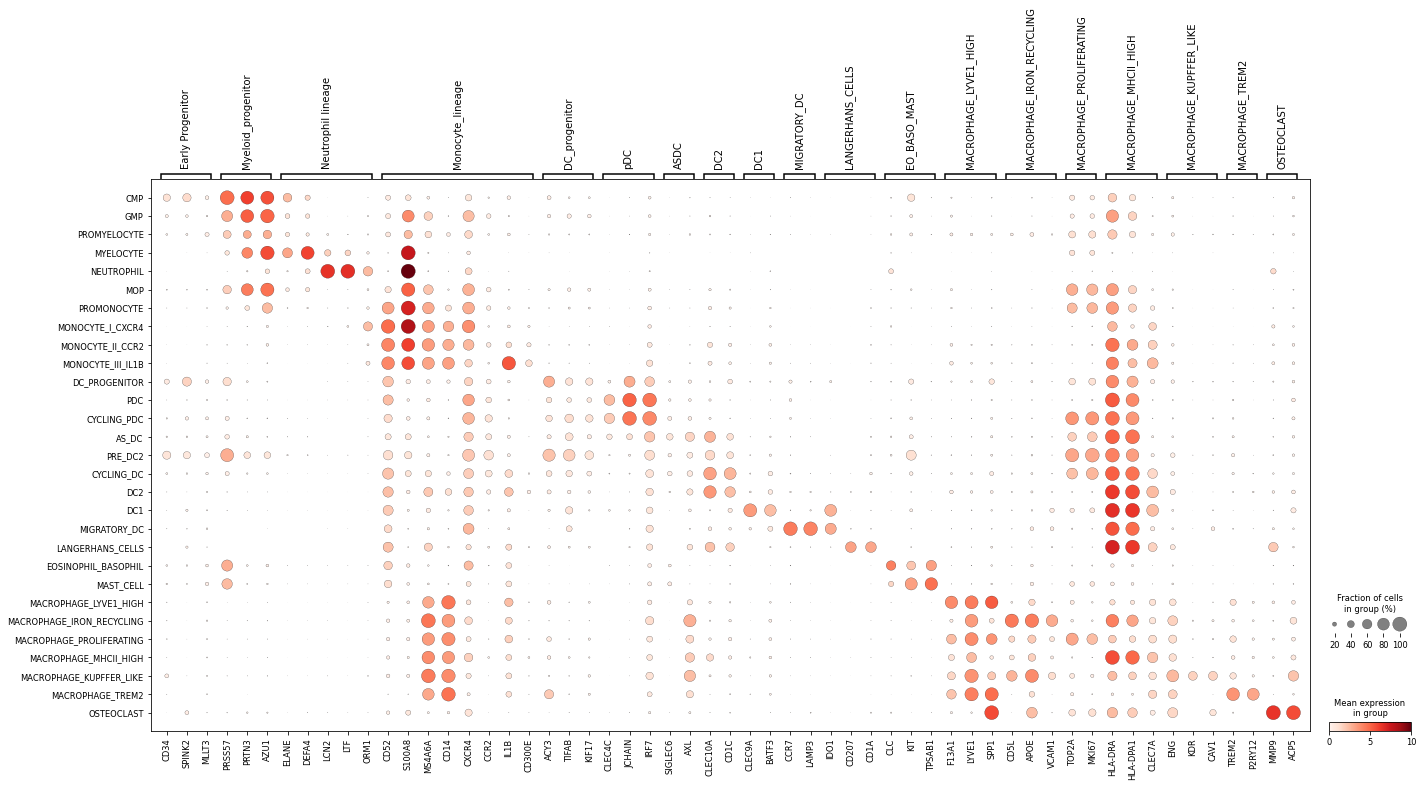

In [13]:
markers = {'Early Progenitor':["CD34",	"SPINK2",	"MLLT3"],
'Myeloid_progenitor':["PRSS57",	"PRTN3",	"AZU1",],
'Neutrophil lineage':["ELANE",	"DEFA4",	"LCN2",	"LTF",	"ORM1",],
'Monocyte_lineage':["CD52",	"S100A8",	"MS4A6A",	"CD14",	"CXCR4",	"CCR2",	"IL1B",	"CD300E",],
'DC_progenitor':["ACY3",	"TIFAB",	"KIF17",],
'pDC':["CLEC4C",	"JCHAIN",	"IRF7",],
'ASDC':["SIGLEC6",	"AXL",],
'DC2':["CLEC10A",	"CD1C",],
'DC1':["CLEC9A",	"BATF3",],
'MIGRATORY_DC':["CCR7",	"LAMP3",],
'LANGERHANS_CELLS':["IDO1","CD207",	"CD1A",],
'EO_BASO_MAST':["CLC",	"KIT",	"TPSAB1",],
'MACROPHAGE_LYVE1_HIGH':["F13A1",	"LYVE1",	"SPP1",],
 'MACROPHAGE_IRON_RECYCLING':["CD5L",	"APOE",	"VCAM1",],
 'MACROPHAGE_PROLIFERATING':["TOP2A",	"MKI67",],
 'MACROPHAGE_MHCII_HIGH':["HLA-DRA",	"HLA-DPA1",	"CLEC7A",],
 'MACROPHAGE_KUPFFER_LIKE':["ENG",	"KDR",	"CAV1",],
#'MACROPHAGE_PERI':["SPP1","OLFML3","CCL3"],
#'MACROPHAGE_ERY':['HBA1','HBA2','HBG2'],
 'MACROPHAGE_TREM2':["TREM2",	"P2RY12",],
'OSTEOCLAST':["MMP9",	"ACP5",]
          }
sc.pl.dotplot(mye, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='mye_anno.pdf')

### MEGA/ERY marker genes

In [14]:
cells = [
 'MEMP',
 'CYCLING_MEMP',
 'MEP',
 'EARLY_ERY',
 'MID_ERY',
 'LATE_ERY',
 'YS_ERY',
 'CYCLING_YS_ERY',
 'EARLY_MK',
 'LATE_MK',
 'VSMC_PERICYTE_III',
 'MACROPHAGE_ERY',]

In [15]:
mega = adata[adata.obs['anno_lvl_2_final_clean'].isin(cells)]

In [16]:
mega.obs['anno_lvl_2_final_clean'] = mega.obs['anno_lvl_2_final_clean'].cat.reorder_categories(cells)

Trying to set attribute `.obs` of view, copying.


... storing 'file' as categorical
... storing 'predicted_doublets' as categorical
... storing 'name' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'organ' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Sample' as categorical


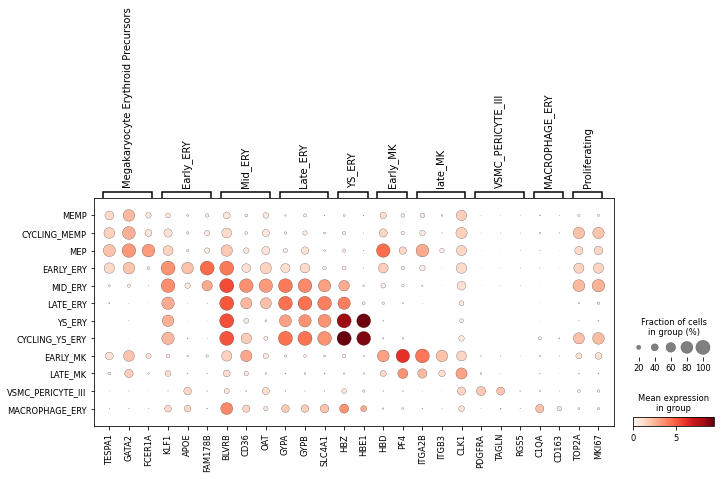

In [17]:
markers = {"Megakaryocyte Erythroid Precursors":['TESPA1','GATA2','FCER1A'],
"Early_ERY":['KLF1','APOE','FAM178B'],
"Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
"Late_ERY":[ 'GYPA', 'GYPB', 'SLC4A1'],
"YS_ERY" : ['HBZ','HBE1'],
"Early_MK":['HBD','PF4'],
"late_MK":['ITGA2B','ITGB3','CLK1'],
"VSMC_PERICYTE_III":['PDGFRA', 'TAGLN','RGS5'],
'MACROPHAGE_ERY':["C1QA","CD163"],
"Proliferating" : ["TOP2A","MKI67"],
          }
sc.pl.dotplot(mega, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='mega_anno.pdf')

### Progenitor marker genes

In [19]:
progenitor = adata[adata.obs['anno_lvl_2_final_clean'].isin(['HSC_MPP', 'CYCLING_MPP', 'LMPP_MLP','PRE_PRO_B', 'DN(early)_T','DN(P)_T', 
                                                                                                  'MEMP','CYCLING_MEMP', 'MEP', 'EARLY_MK', 'DOUBLET_ERY_B', 
                                                                                                  'CMP', 'GMP',  'PROMONOCYTE', 'PROMYELOCYTE'])]

In [20]:
progenitor.obs['anno_lvl_2_final_clean'] = progenitor.obs['anno_lvl_2_final_clean'].cat.reorder_categories(['HSC_MPP', 'CYCLING_MPP', 'LMPP_MLP','PRE_PRO_B', 'DN(early)_T','DN(P)_T', 
                                                                                                  'MEMP','CYCLING_MEMP', 'MEP', 'EARLY_MK', 'DOUBLET_ERY_B', 
                                                                                                  'CMP', 'GMP',  'PROMONOCYTE', 'PROMYELOCYTE'])

Trying to set attribute `.obs` of view, copying.


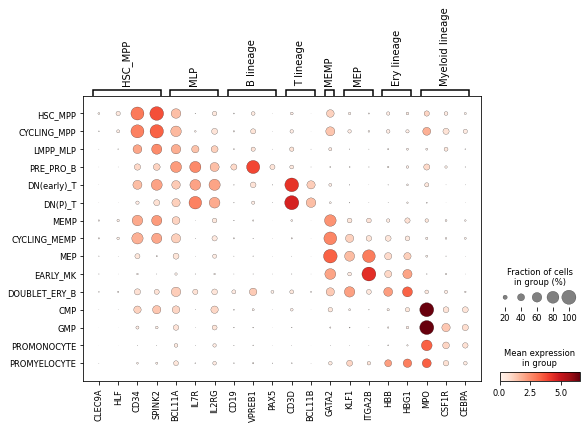

In [49]:
markers = {'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
           'MLP':['BCL11A','IL7R','IL2RG'],
           'B lineage':['CD19','VPREB1','PAX5'],
           'T lineage':['CD3D','BCL11B'],
           'MEMP':['GATA2'],
           'MEP':['KLF1','ITGA2B'],
           'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA']
          }
sc.pl.dotplot(progenitor, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='progenitor_anno.pdf')

### Stroma marker genes

In [36]:
stroma = sc.read_h5ad("/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.20210429.STROMA.embedding.h5ad")

In [37]:
stroma.var_names_make_unique()
stroma.raw = stroma.copy()

In [38]:
stroma = stroma[stroma.obs_names.isin(obs.index)].copy()

In [39]:
for col in obs:
    stroma.obs[col] = obs[col] # use anno_lvl_2_final_clean

In [40]:
stroma.obs['anno_lvl_2_final_clean'] = stroma.obs['anno_lvl_2_final_clean'].astype('category')

In [41]:
set(stroma.obs['anno_lvl_2_final_clean'])

{'CHONDROCYTE',
 'CYCLING_EPITHELIUM',
 'CYCLING_FIBROBLAST_I',
 'CYCLING_FIBROBLAST_II',
 'DEVELOPING_NEPHRON_I',
 'DEVELOPING_NEPHRON_II',
 'DOUBLET_ENDOTHELIUM_ERYTHROCYTE',
 'DOUBLET_IMMUNE_FIBROBLAST',
 'ENDOTHELIUM_I',
 'ENDOTHELIUM_II',
 'ENDOTHELIUM_III',
 'ENDOTHELIUM_IV',
 'ENDOTHELIUM_V',
 'ENTEROENDOCRINE_I',
 'ENTEROENDOCRINE_II',
 'EPITHELIUM_I',
 'EPITHELIUM_II',
 'FIBROBLAST_I',
 'FIBROBLAST_II',
 'FIBROBLAST_III',
 'FIBROBLAST_IV',
 'FIBROBLAST_IX',
 'FIBROBLAST_V',
 'FIBROBLAST_VI',
 'FIBROBLAST_VII',
 'FIBROBLAST_VIII',
 'FIBROBLAST_X',
 'FIBROBLAST_XI',
 'FIBROBLAST_XII',
 'FIBROBLAST_XIII',
 'FIBROBLAST_XIV',
 'FIBROBLAST_XV',
 'FIBROBLAST_XVI',
 'GLIAL',
 'HEPATOCYTE-LIKE',
 'HEPATOCYTE_I',
 'HEPATOCYTE_II',
 'INTERSTITIAL_CELLS_OF_CAJAL',
 'KERATINOCYTE',
 'LOW_QUALITY',
 'MACROPHAGE_PERI',
 'MELANOCYTE',
 'MESENCHYMAL_LYMPHOID_TISSUE_ORGANISER',
 'MESOTHELIUM',
 'MUSCLE_SATELLITE',
 'MYOFIBROBLAST',
 'MYOFIBROBLAST_I',
 'NEURON',
 'OSTEOBLAST',
 'SKELETAL_MUSCLE

In [42]:
stroma.obs['anno_lvl_2_final_clean'] = stroma.obs['anno_lvl_2_final_clean'].cat.reorder_categories([ 'FIBROBLAST_I','FIBROBLAST_II','FIBROBLAST_III','FIBROBLAST_IV','FIBROBLAST_IX','FIBROBLAST_V',
  'FIBROBLAST_VI','FIBROBLAST_VII','FIBROBLAST_VIII','FIBROBLAST_X','FIBROBLAST_XI','FIBROBLAST_XII',
  'FIBROBLAST_XIII','FIBROBLAST_XIV','FIBROBLAST_XV','FIBROBLAST_XVI','CYCLING_FIBROBLAST_I','CYCLING_FIBROBLAST_II',
  'MYOFIBROBLAST','MYOFIBROBLAST_I','MESENCHYMAL_LYMPHOID_TISSUE_ORGANISER','MUSCLE_SATELLITE','SKELETAL_MUSCLE',
  'SMOOTH_MUSCLE','MESOTHELIUM','OSTEOBLAST','CHONDROCYTE','GLIAL','NEURON','MELANOCYTE','KERATINOCYTE','HEPATOCYTE_I',
  'HEPATOCYTE_II','HEPATOCYTE-LIKE','DEVELOPING_NEPHRON_I','DEVELOPING_NEPHRON_II','EPITHELIUM_I','EPITHELIUM_II',
  'YS_STROMA','CYCLING_EPITHELIUM','INTERSTITIAL_CELLS_OF_CAJAL','ENTEROENDOCRINE_I','ENTEROENDOCRINE_II','ENDOTHELIUM_I',
  'ENDOTHELIUM_II','ENDOTHELIUM_III','ENDOTHELIUM_IV','ENDOTHELIUM_V', 'VSMC_PERICYTE','VSMC_PERICYTE_I', 'VSMC_PERICYTE_II',
  'MACROPHAGE_PERI','DOUBLET_ENDOTHELIUM_ERYTHROCYTE','DOUBLET_IMMUNE_FIBROBLAST','LOW_QUALITY'])

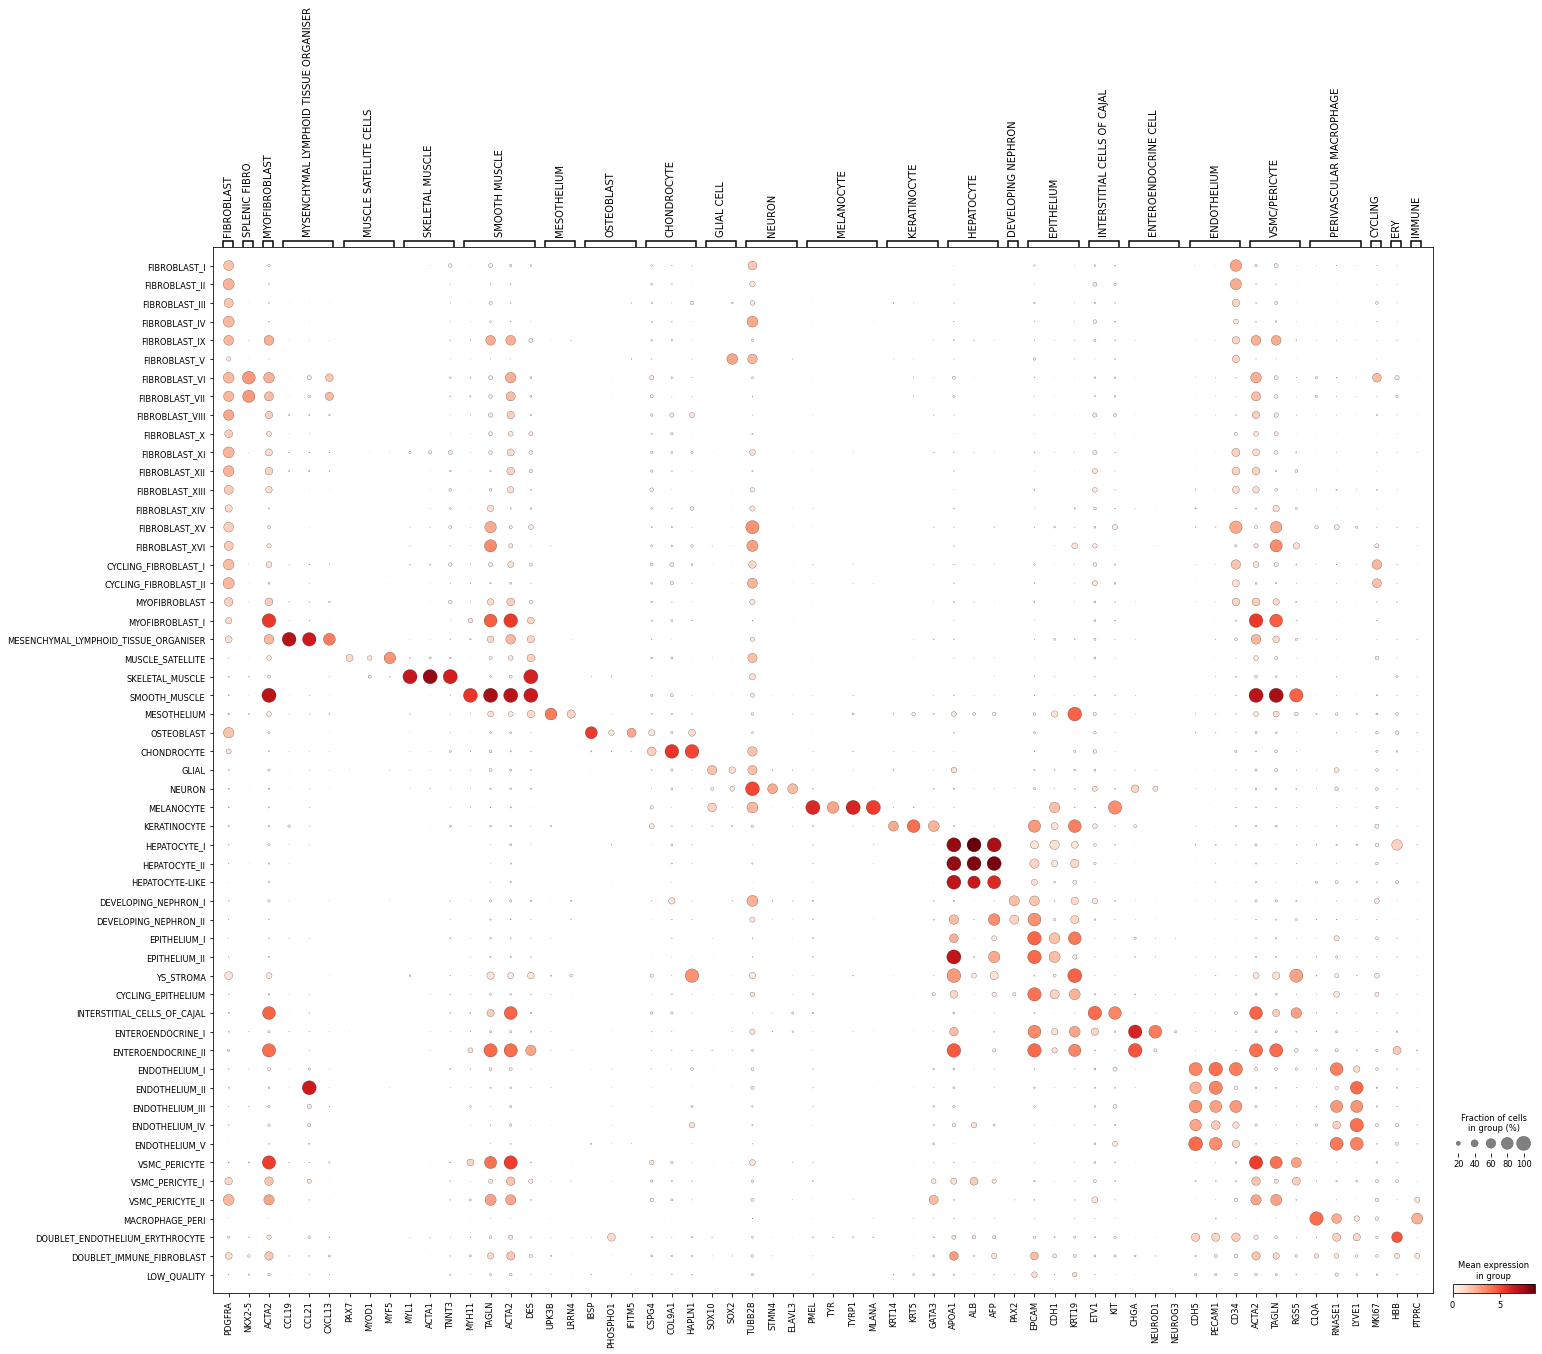

In [48]:
markers = {'FIBROBLAST':['PDGFRA'],
           'SPLENIC FIBRO':['NKX2-5'],
           'MYOFIBROBLAST':['ACTA2'],
           'MYSENCHYMAL LYMPHOID TISSUE ORGANISER':['CCL19','CCL21','CXCL13'],
           'MUSCLE SATELLITE CELLS':['PAX7','MYOD1','MYF5'],
           'SKELETAL MUSCLE':['MYL1','ACTA1','TNNT3'],
           'SMOOTH MUSCLE':['MYH11','TAGLN','ACTA2','DES'],
           'MESOTHELIUM':['UPK3B','LRRN4'],
           'OSTEOBLAST':['IBSP','PHOSPHO1','IFITM5'],
           'CHONDROCYTE':['CSPG4','COL9A1','HAPLN1'],
           'GLIAL CELL':['SOX10','SOX2'],
           'NEURON':['TUBB2B','STMN4','ELAVL3'],
           'MELANOCYTE':['PMEL','TYR','TYRP1','MLANA'],
           'KERATINOCYTE':['KRT14','KRT5','GATA3'],
           'HEPATOCYTE':['APOA1','ALB','AFP'],
           'DEVELOPING NEPHRON':['PAX2'],
           'EPITHELIUM':['EPCAM','CDH1','KRT19'],
           'INTERSTITIAL CELLS OF CAJAL':['ETV1','KIT'],
           'ENTEROENDOCRINE CELL':['CHGA','NEUROD1','NEUROG3'],
           'ENDOTHELIUM':['CDH5','PECAM1','CD34'],
           #'TIP EC':['VIM','PODXL','IL32','KDR'],
           'VSMC/PERICYTE':['ACTA2','TAGLN','RGS5'],
           'PERIVASCULAR MACROPHAGE':['C1QA','RNASE1','LYVE1'],
           'CYCLING':['MKI67'],
           'ERY':['HBB'],
           'IMMUNE':['PTPRC']
          }
sc.pl.dotplot(stroma, markers, 'anno_lvl_2_final_clean', dendrogram=False, use_raw=False, save='stroma_anno.pdf')

---

## Plot annotated UMAP embeddings

In [4]:
## r2py setup
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

anndata2ri.activate()

In [5]:
%load_ext rpy2.ipython


In [6]:
%%R
library(tidyverse)
library(reshape2)
library(patchwork)

remove_x_axis <- function(){
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank())  
}

remove_y_axis <- function(){
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.title.y = element_blank())  
}

In [201]:
## Read full annotation
data_dir = '/nfs/team205/ed6/data/Fetal_immune/'
anno_obs = pd.read_csv(data_dir + "PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv", index_col=0)

In [202]:
## Read annotation groupings
import json
with open('../metadata/anno_groups.json', 'r') as json_file:
    anno_groups_dict = json.load(json_file)

### Myeloid

In [276]:
anno_group_myeloid = {
    'Progenitors': ['HSC_MPP','CMP',
  'GMP',
  'MOP',
    
    'LMPP_MLP',
    'MEMP',
    'MEP',
    'CYCLING_MEMP',
    'CYCLING_MPP',
    
                    'PROMONOCYTE',
                
  'PROMYELOCYTE',
                       'MYELOCYTE',
    'DC_PROGENITOR',
],
 'DCs': [
  'AS_DC',
     'PRE_DC2',
  'DC1',
  'DC2',
    "DC3",
     'CYCLING_DC',
  'MIGRATORY_DC',
       'PDC',
  'CYCLING_PDC',
  ],
 'Granulocytes': ['NEUTROPHIL', 'MAST_CELL', 'EOSINOPHIL_BASOPHIL'],
 'Mono': ['MONOCYTE_I_CXCR4', 'MONOCYTE_II_CCR2', 'MONOCYTE_III_IL1B'],
 'MACs': ['MACROPHAGE_PROLIFERATING',
  'MACROPHAGE_MHCII_HIGH',
  'MACROPHAGE_LYVE1_HIGH',
  'MACROPHAGE_IRON_RECYCLING',
  'MACROPHAGE_KUPFFER_LIKE',
  'MACROPHAGE_TREM2',
           'LANGERHANS_CELLS',
            'OSTEOCLAST'
         ],
 'low quality': ['FIBROBLAST_XVII',
  'YS_ERY',
  'CYCLING_YS_ERY',
  'YS_STROMA',
  'DEVELOPING_NEPHRON_I',
  'DEVELOPING_NEPHRON_II',
           'EARLY_MK',
    'LOW_QUALITY_MACROPHAGE',
           'DOUBLET_ERY_B'
          ]
}

anno_group_myeloid_rev = {x:g for g,a in anno_group_myeloid.items() for x in a}

In [206]:
data_dir="/nfs/team205/ed6/data/Fetal_immune/"
timestamp="20210429"
split="MYELOID_V2"

In [207]:
data_dir="/nfs/team205/ed6/data/Fetal_immune/"
timestamp="20210429"

In [161]:
adata = sc.read_h5ad(data_dir + 'PAN.A01.v01.entire_data_normalised_log.{t}.{s}.embedding.h5ad'.format(t=timestamp, s=split), backed="r")
adata.var_names_make_unique()

In [208]:
anno_obs = pd.read_csv(data_dir + "PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv", index_col=0)
anno_obs_mye = anno_obs.loc[adata.obs_names[adata.obs_names.isin(anno_obs.index)]].copy()

In [209]:
anno_obs = anno_obs_mye.copy()
anno_group = anno_group_myeloid.copy()
anno_group_rev = anno_group_myeloid_rev.copy()

org_count_df = anno_obs_mye.groupby(["organ", "anno_lvl_2_final_clean"]).count()['file'].reset_index()
org_count_df["anno_group"] = [anno_group_rev[x] if x in anno_group_rev.keys() else np.nan for x in org_count_df.anno_lvl_2_final_clean]
org_count_df["anno"] = org_count_df["anno_lvl_2_final_clean"]

age_count_df = anno_obs_mye.groupby(["age", "anno_lvl_2_final_clean"]).count()['file'].reset_index()
age_count_df["anno_group"] = [anno_group_rev[x] if x in anno_group_rev.keys() else np.nan for x in age_count_df.anno_lvl_2_final_clean]
age_count_df["anno"] = age_count_df["anno_lvl_2_final_clean"]

anno_group_order = list(anno_group.keys())
anno_order = [x for x in sum([v for v in anno_group.values()],[]) if x in anno_obs_mye.anno_lvl_2_final_clean.values]

In [84]:
adata.obs['anno_lvl_2_final_clean'] = np.nan
adata.obs.loc[adata.obs_names.isin(anno_obs_mye.index), 'anno_lvl_2_final_clean'] = anno_obs_mye.loc[adata.obs_names[adata.obs_names.isin(anno_obs_mye.index)]]['anno_lvl_2_final_clean']

In [85]:
anno_numbering = {anno_order[i]:str(i+1) for i in range(len(anno_order))}
adata.obs['anno_number'] = [anno_numbering[x] if x in anno_order else np.nan for x in adata.obs['anno_lvl_2_final_clean']]

saving figure to file /home/jovyan/mount/gdrive/Pan_fetal/writing/ms_figures/draft_panels/assemble_fig2/scvelo_MYELOID_V2_annotation_embedding.png


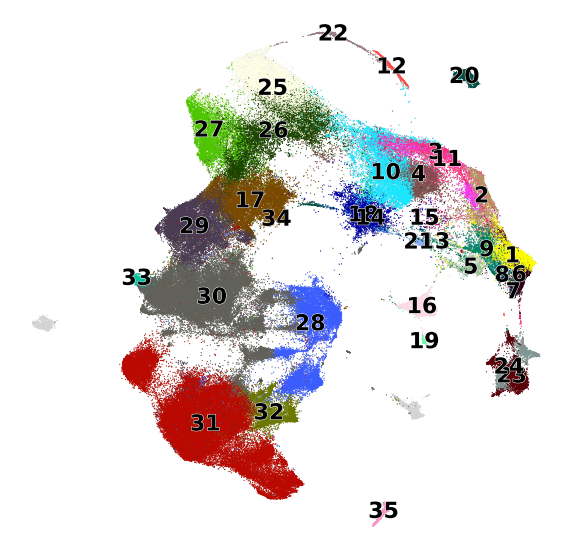

In [32]:
high_q_numbers = adata.obs['anno_number'][~adata.obs['anno_lvl_2_final_clean'].isin(anno_group_myeloid['low quality'])].unique().astype("str")
plt.rcParams['figure.figsize'] = [10,10]
scv.pl.umap(adata, color=['anno_number'], 
            title="", legend_fontsize=22, size=5,
            groups= high_q_numbers,
            save='MYELOID_V2_annotation_embedding.png'
           )

Make legend

In [34]:
color_dict = dict(zip(adata.obs['anno_number'].cat.categories, adata.uns['anno_number_colors']))
anno_order_labels = ["({n}) {a}".format(n=str(i+1),a=anno_order[i]) for i in range(len(anno_order))]
anno_number = ["{n}".format(n=str(i+1)) for i in range(len(anno_order))]

anno_order_df = pd.DataFrame([anno_order_labels, anno_order]).T
anno_order_df.columns = ['anno_order_labels', 'anno_lvl_2_final_clean']
anno_order_df['anno_number'] = [anno_numbering[x] for x in anno_order_df['anno_lvl_2_final_clean']]
anno_order_df['anno_color'] = [color_dict[x] for x in anno_order_df['anno_number']]
anno_order_df['anno_group'] = [anno_group_myeloid_rev[x] for x in anno_order_df['anno_lvl_2_final_clean']]

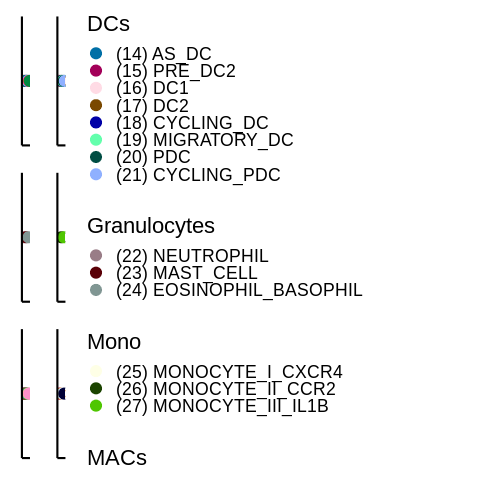

In [35]:
%%R -i anno_order_df -i figdir
library(ggpubr)
anno_order_df$anno_order_labels <- factor(anno_order_df$anno_order_labels, levels=anno_order_df$anno_order_labels)
leg_ls <- lapply(unique(anno_order_df$anno_group), function(g) {
    pl <- anno_order_df %>%
    filter(anno_group==g) %>%
    ggplot(aes(anno_order_labels, 1, color=anno_order_labels)) +
    geom_point(size=5) +
    theme_classic(base_size=22) +
    remove_x_axis() +
    remove_y_axis() +
    scale_color_manual(values=setNames(anno_order_df$anno_color, anno_order_df$anno_order_labels),
                      name=g)
#     leg <- get_legend(pl)
#     leg
    pl
    }
)

(wrap_plots(leg_ls, ncol=2) +
plot_layout(guides='collect') & 
theme(legend.justification = "left") &
guides(color=guide_legend(ncol = 1))) +
ggsave(paste0(figdir, "mye_embedding_legend.pdf"), height=15, width=12)

### Lymphoid

In [275]:
anno_group_lymphoid = {
    'NK cells': ['NK', 'CYCLING_NK'],
    'ILCs': ['ILC2','ILC3','CYCLING_ILC'],
    'B cells': [
      'PRE_PRO_B',
          'PRO_B',
        'LATE_PRO_B',
        'LARGE_PRE_B',
        'SMALL_PRE_B',
    'IMMATURE_B',
      'MATURE_B',
      'B1',
  'CYCLING_B',
      'PLASMA_B'],
    'Developing T cells': [              
                'DN(early)_T',
                'DN(Q)_T',
                'DN(P)_T',
                'DP(P)_T',
                'DP(Q)_T',
                'ABT(ENTRY)'
               ],
    'Conventional SP T cells':['CYCLING_T',
                'CD4+T',
                'CD8+T',
                               'TREG'
    ],
 'Unconventional T cells': [ 'TYPE_1_INNATE_T', 'TYPE_3_INNATE_T','CD8AA'],
    "low quality":['HIGH_MITO','DOUBLET_ERY_B']}

anno_group_lymphoid_rev = {x:g for g,a in anno_group_lymphoid.items() for x in a}

In [277]:
data_dir="/nfs/team205/ed6/data/Fetal_immune/"
timestamp="20210429"
split="LYMPHOID"

In [278]:
data_dir="/nfs/team205/ed6/data/Fetal_immune/"
timestamp="20210429"

In [94]:
adata = sc.read_h5ad(data_dir + 'PAN.A01.v01.entire_data_normalised_log.{t}.{s}.embedding.h5ad'.format(t=timestamp, s=split), backed="r")
adata.var_names_make_unique()

In [279]:
anno_obs = pd.read_csv(data_dir + "PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv", index_col=0)
anno_obs_lym = anno_obs.loc[adata.obs_names[adata.obs_names.isin(anno_obs.index)]].copy()

In [280]:
anno_obs = anno_obs_lym.copy()
anno_group = anno_group_lymphoid.copy()
anno_group_rev = anno_group_lymphoid_rev.copy()

org_count_df = anno_obs_lym.groupby(["organ", "anno_lvl_2_final_clean"]).count()['file'].reset_index()
org_count_df["anno_group"] = [anno_group_rev[x] if x in anno_group_rev.keys() else np.nan for x in org_count_df.anno_lvl_2_final_clean]
org_count_df["anno"] = org_count_df["anno_lvl_2_final_clean"]

age_count_df = anno_obs_lym.groupby(["age", "anno_lvl_2_final_clean"]).count()['file'].reset_index()
age_count_df["anno_group"] = [anno_group_rev[x] if x in anno_group_rev.keys() else np.nan for x in age_count_df.anno_lvl_2_final_clean]
age_count_df["anno"] = age_count_df["anno_lvl_2_final_clean"]

anno_group_order = list(anno_group.keys())
anno_order = sum([v for v in anno_group.values()],[])

In [97]:
adata.obs['anno_lvl_2_final_clean'] = np.nan
adata.obs.loc[adata.obs_names.isin(anno_obs_lym.index), 'anno_lvl_2_final_clean'] = anno_obs_lym.loc[adata.obs_names[adata.obs_names.isin(anno_obs_lym.index)]]['anno_lvl_2_final_clean']

In [98]:
anno_numbering = {anno_order[i]:str(i+1) for i in range(len(anno_order))}
adata.obs['anno_number'] = [anno_numbering[x] if x in anno_order else np.nan for x in adata.obs['anno_lvl_2_final_clean']]

saving figure to file /home/jovyan/mount/gdrive/Pan_fetal/writing/ms_figures/draft_panels/Fig2_myeloid_lymphoid/assemble_fig2/scvelo_LYMPHOID_annotation_embedding.png


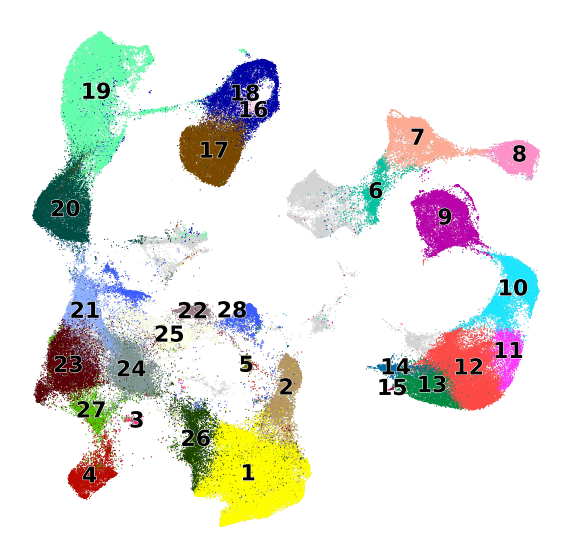

In [99]:
high_q_numbers = adata.obs['anno_number'][~adata.obs['anno_lvl_2_final_clean'].isin(anno_group_lymphoid['low quality'])].unique().astype("str")

plt.rcParams['figure.figsize'] = [10,10]
scv.pl.umap(adata, color=['anno_number'], 
            title="", legend_fontsize=22, size=5,
            groups=high_q_numbers,
            save='LYMPHOID_annotation_embedding.png'
           )

Make legend

In [81]:
color_dict = dict(zip(adata.obs['anno_number'].cat.categories, adata.uns['anno_number_colors']))
anno_order_labels = ["({n}) {a}".format(n=str(i+1),a=anno_order[i]) for i in range(len(anno_order))]
anno_number = ["{n}".format(n=str(i+1)) for i in range(len(anno_order))]

anno_order_df = pd.DataFrame([anno_order_labels, anno_order]).T
anno_order_df.columns = ['anno_order_labels', 'anno_lvl_2_final_clean']
anno_order_df['anno_number'] = [anno_numbering[x] for x in anno_order_df['anno_lvl_2_final_clean']]
anno_order_df['anno_color'] = [color_dict[x] for x in anno_order_df['anno_number']]
anno_order_df['anno_group'] = [anno_group_lymphoid_rev[x] for x in anno_order_df['anno_lvl_2_final_clean']]

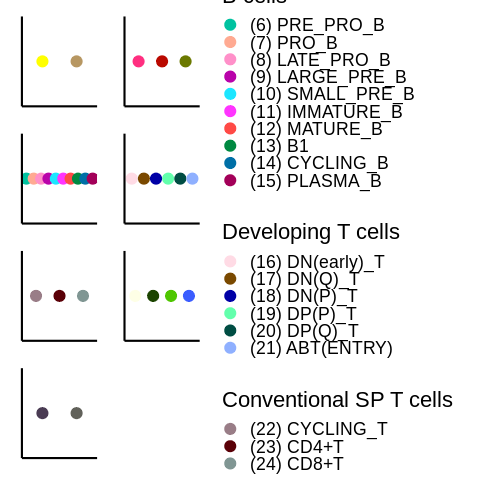

In [82]:
%%R -i anno_order_df 
library(ggpubr)
anno_order_df$anno_order_labels <- factor(anno_order_df$anno_order_labels, levels=anno_order_df$anno_order_labels)
leg_ls <- lapply(unique(anno_order_df$anno_group), function(g) {
    pl <- anno_order_df %>%
    filter(anno_group==g) %>%
    ggplot(aes(anno_order_labels, 1, color=anno_order_labels)) +
    geom_point(size=5) +
    theme_classic(base_size=22) +
    remove_x_axis() +
    remove_y_axis() +
    scale_color_manual(values=setNames(anno_order_df$anno_color, anno_order_df$anno_order_labels),
                      name=g)
#     leg <- get_legend(pl)
#     leg
    pl
    }
)

(wrap_plots(leg_ls, ncol=2) +
plot_layout(guides='collect') & 
theme(legend.justification = "left") &
guides(color=guide_legend(ncol = 1))) +
ggsave(paste0(figdir, "lym_embedding_legend.pdf"), height=14, width=12)

### Progenitors

In [113]:
split="HSC_PROGENITORS"

In [114]:
adata = sc.read_h5ad(data_dir + 'PAN.A01.v01.entire_data_normalised_log.{t}.{s}.embedding.h5ad'.format(t=timestamp, s=split), backed="r")
adata.var_names_make_unique()

In [115]:
anno_obs = pd.read_csv(data_dir + "PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv", index_col=0)
anno_obs_lym = anno_obs.loc[adata.obs_names[adata.obs_names.isin(anno_obs.index)]].copy()

In [116]:
anno_obs = anno_obs_lym.copy()
anno_order = list(anno_obs_lym['anno_lvl_2_final_clean'].unique())
anno_order.sort()
anno_group = {split:anno_order}

In [117]:
adata.obs['anno_lvl_2_final_clean'] = np.nan
adata.obs.loc[adata.obs_names.isin(anno_obs_lym.index), 'anno_lvl_2_final_clean'] = anno_obs_lym.loc[adata.obs_names[adata.obs_names.isin(anno_obs_lym.index)]]['anno_lvl_2_final_clean']

In [118]:
anno_numbering = {anno_order[i]:str(i+1) for i in range(len(anno_order))}
adata.obs['anno_number'] = [anno_numbering[x] if x in anno_order else np.nan for x in adata.obs['anno_lvl_2_final_clean']]

saving figure to file /home/jovyan/mount/gdrive/Pan_fetal/writing/ms_figures/draft_panels/assemble_fig2/scvelo_HSC_PROGENITORS_annotation_embedding.png


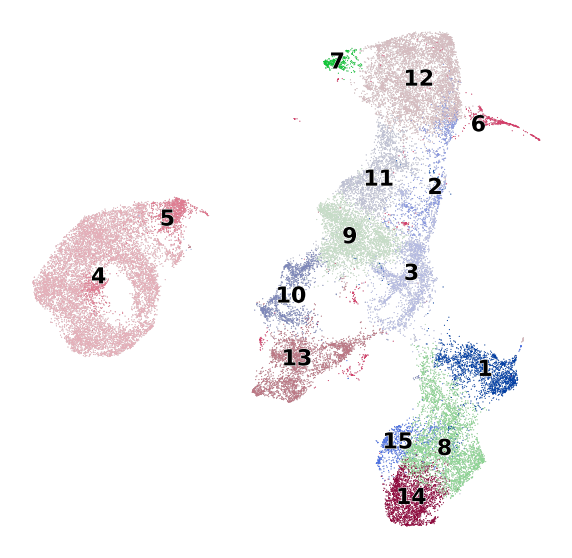

In [119]:
# high_q_numbers = adata.obs['anno_number'][~adata.obs['anno_lvl_2_final_clean'].isin(anno_group_lymphoid['low quality'])].unique().astype("str")

plt.rcParams['figure.figsize'] = [10,10]
scv.pl.umap(adata, color=['anno_number'], 
            title="", legend_fontsize=22, size=5,
#             groups=high_q_numbers,
            save='{s}_annotation_embedding.png'.format(s=split)
           )

Make legend

In [120]:
color_dict = dict(zip(adata.obs['anno_number'].cat.categories, adata.uns['anno_number_colors']))
anno_order_labels = ["({n}) {a}".format(n=str(i+1),a=anno_order[i]) for i in range(len(anno_order))]
anno_number = ["{n}".format(n=str(i+1)) for i in range(len(anno_order))]

anno_order_df = pd.DataFrame([anno_order_labels, anno_order]).T
anno_order_df.columns = ['anno_order_labels', 'anno_lvl_2_final_clean']
anno_order_df['anno_number'] = [anno_numbering[x] for x in anno_order_df['anno_lvl_2_final_clean']]
anno_order_df['anno_color'] = [color_dict[x] for x in anno_order_df['anno_number']]
anno_order_df['anno_group'] = split

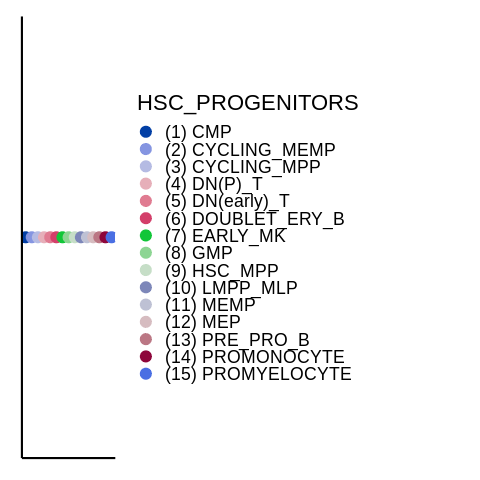

In [121]:
%%R -i anno_order_df 
library(ggpubr)
anno_order_df$anno_order_labels <- factor(anno_order_df$anno_order_labels, levels=anno_order_df$anno_order_labels)
leg_ls <- lapply(unique(anno_order_df$anno_group), function(g) {
    pl <- anno_order_df %>%
    filter(anno_group==g) %>%
    ggplot(aes(anno_order_labels, 1, color=anno_order_labels)) +
    geom_point(size=5) +
    theme_classic(base_size=22) +
    remove_x_axis() +
    remove_y_axis() +
    scale_color_manual(values=setNames(anno_order_df$anno_color, anno_order_df$anno_order_labels),
                      name=g)
#     leg <- get_legend(pl)
#     leg
    pl
    }
)

(wrap_plots(leg_ls, ncol=2) +
plot_layout(guides='collect') & 
theme(legend.justification = "left") &
guides(color=guide_legend(ncol = 1))) +
ggsave(paste0(figdir, "progenitor_embedding_legend.pdf"), height=14, width=12)

### NK/T cells

In [187]:
split="NKT"

In [188]:
adata = sc.read_h5ad(data_dir + 'PAN.A01.v01.entire_data_normalised_log.{t}.{s}.embedding.h5ad'.format(t=timestamp, s=split), backed="r")
adata.var_names_make_unique()

In [189]:
anno_obs = pd.read_csv(data_dir + "PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv", index_col=0)
anno_obs_lym = anno_obs.loc[adata.obs_names[adata.obs_names.isin(anno_obs.index)]].copy()

In [190]:
anno_obs = anno_obs_lym.copy()
anno_order = sum([anno_group_lymphoid[x] for x in ['NK cells', 'ILCs', 'Developing T cells', 'Conventional SP T cells', 'Unconventional T cells']], [])
# keep_annos = 
anno_order.sort()
anno_group = {split:anno_order}

In [191]:
adata.obs['anno_lvl_2_final_clean'] = np.nan
adata.obs.loc[adata.obs_names.isin(anno_obs_lym.index), 'anno_lvl_2_final_clean'] = anno_obs_lym.loc[adata.obs_names[adata.obs_names.isin(anno_obs_lym.index)]]['anno_lvl_2_final_clean']

In [192]:
anno_numbering = {anno_order[i]:str(i+1) for i in range(len(anno_order))}
adata.obs['anno_number'] = [anno_numbering[x] if x in anno_order else np.nan for x in adata.obs['anno_lvl_2_final_clean']]

saving figure to file /home/jovyan/mount/gdrive/Pan_fetal/writing/ms_figures/draft_panels/assemble_fig2/scvelo_NKT_annotation_embedding.png


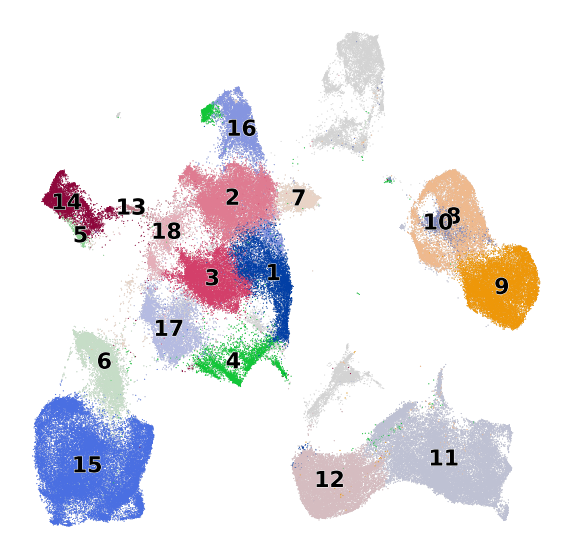

In [193]:
high_q_numbers = adata.obs['anno_number'][adata.obs['anno_lvl_2_final_clean'].isin(anno_order)].unique().astype("str")

plt.rcParams['figure.figsize'] = [10,10]
scv.pl.umap(adata, color=['anno_number'], 
            title="", legend_fontsize=22, size=5,
            groups=high_q_numbers,
            save='{s}_annotation_embedding.png'.format(s=split)
           )

Make legend

In [194]:
color_dict = dict(zip(adata.obs['anno_number'].cat.categories, adata.uns['anno_number_colors']))
anno_order_labels = ["({n}) {a}".format(n=str(i+1),a=anno_order[i]) for i in range(len(anno_order))]
anno_number = ["{n}".format(n=str(i+1)) for i in range(len(anno_order))]

anno_order_df = pd.DataFrame([anno_order_labels, anno_order]).T
anno_order_df.columns = ['anno_order_labels', 'anno_lvl_2_final_clean']
anno_order_df['anno_number'] = [anno_numbering[x] for x in anno_order_df['anno_lvl_2_final_clean']]
anno_order_df['anno_color'] = [color_dict[x] for x in anno_order_df['anno_number']]
anno_order_df['anno_group'] = split

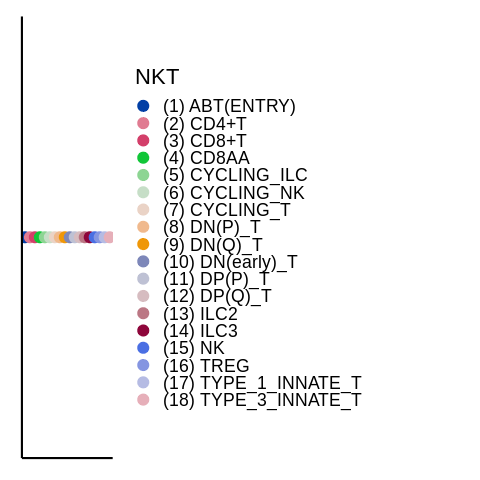

In [195]:
%%R -i anno_order_df 
library(ggpubr)
anno_order_df$anno_order_labels <- factor(anno_order_df$anno_order_labels, levels=anno_order_df$anno_order_labels)
leg_ls <- lapply(unique(anno_order_df$anno_group), function(g) {
    pl <- anno_order_df %>%
    filter(anno_group==g) %>%
    ggplot(aes(anno_order_labels, 1, color=anno_order_labels)) +
    geom_point(size=5) +
    theme_classic(base_size=22) +
    remove_x_axis() +
    remove_y_axis() +
    scale_color_manual(values=setNames(anno_order_df$anno_color, anno_order_df$anno_order_labels),
                      name=g)
#     leg <- get_legend(pl)
#     leg
    pl
    }
)

(wrap_plots(leg_ls, ncol=2) +
plot_layout(guides='collect') & 
theme(legend.justification = "left") &
guides(color=guide_legend(ncol = 1))) +
ggsave(paste0(figdir, "nkt_embedding_legend.pdf"), height=14, width=12)

### Erythroid/mk cells

In [27]:
split="MEM_PROGENITORS"

In [28]:
adata = sc.read_h5ad(data_dir + 'PAN.A01.v01.entire_data_normalised_log.{t}.{s}.embedding.h5ad'.format(t=timestamp, s=split), backed="r")
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [29]:
anno_obs = pd.read_csv(data_dir + "PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv", index_col=0)
anno_obs_lym = anno_obs.loc[adata.obs_names[adata.obs_names.isin(anno_obs.index)]].copy()

In [33]:
anno_groups_dict['ERYTHROID CELLS']

['EARLY_ERY', 'EARLY_MK', 'PROMYELOCYTE', 'MID_ERY', 'LATE_ERY', 'LATE_MK']

In [47]:
anno_groups_ery = {
    "ERYTHROID":['MEMP', "CYCLING_MEMP","MEP", 'EARLY_ERY',  'MID_ERY', 'LATE_ERY', 'YS_ERY', "CYCLING_YS_ERY",'EARLY_MK','LATE_MK', 
                 "VSMC_PERICYTE_III", "MACROPHAGE_ERY"],
    "OTHER":[x for x in anno_obs_lym.anno_lvl_2_final_clean.unique() if x in anno_groups_dict['OTHER']]
}

In [48]:
anno_obs = anno_obs_lym.copy()
anno_order = sum([v for v in anno_groups_ery.values()], [])
# keep_annos = 
anno_group = {split:anno_order}

In [49]:
adata.obs['anno_lvl_2_final_clean'] = np.nan
adata.obs.loc[adata.obs_names.isin(anno_obs_lym.index), 'anno_lvl_2_final_clean'] = anno_obs_lym.loc[adata.obs_names[adata.obs_names.isin(anno_obs_lym.index)]]['anno_lvl_2_final_clean']

In [50]:
anno_numbering = {anno_order[i]:str(i+1) for i in range(len(anno_order))}
adata.obs['anno_number'] = [anno_numbering[x] if x in anno_order else np.nan for x in adata.obs['anno_lvl_2_final_clean']]

saving figure to file /home/jovyan/mount/gdrive/Pan_fetal/writing/ms_figures/draft_panels/assemble_fig2/scvelo_MEM_PROGENITORS_annotation_embedding.png


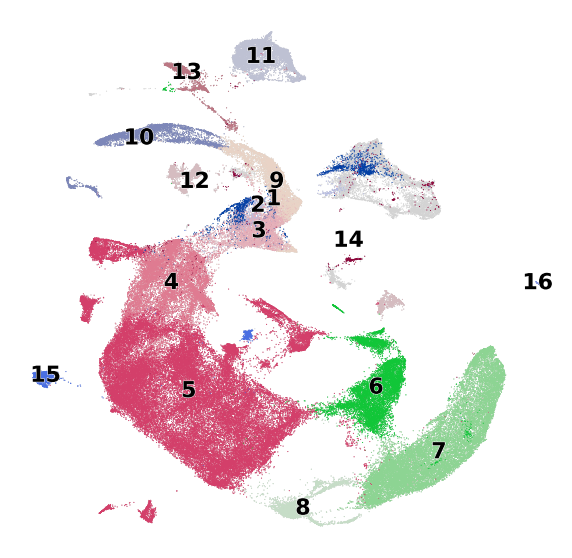

In [51]:
high_q_numbers = adata.obs['anno_number'][adata.obs['anno_lvl_2_final_clean'].isin(anno_order)].unique().astype("str")

plt.rcParams['figure.figsize'] = [10,10]
scv.pl.umap(adata, color=['anno_number'], 
            title="", legend_fontsize=22, size=5,
            groups=high_q_numbers,
            save='{s}_annotation_embedding.png'.format(s=split)
           )

Make legend

In [52]:
color_dict = dict(zip(adata.obs['anno_number'].cat.categories, adata.uns['anno_number_colors']))
anno_order_labels = ["({n}) {a}".format(n=str(i+1),a=anno_order[i]) for i in range(len(anno_order))]
anno_number = ["{n}".format(n=str(i+1)) for i in range(len(anno_order))]

anno_order_df = pd.DataFrame([anno_order_labels, anno_order]).T
anno_order_df.columns = ['anno_order_labels', 'anno_lvl_2_final_clean']
anno_order_df['anno_number'] = [anno_numbering[x] for x in anno_order_df['anno_lvl_2_final_clean']]
anno_order_df['anno_color'] = [color_dict[x] for x in anno_order_df['anno_number']]
anno_order_df['anno_group'] = split

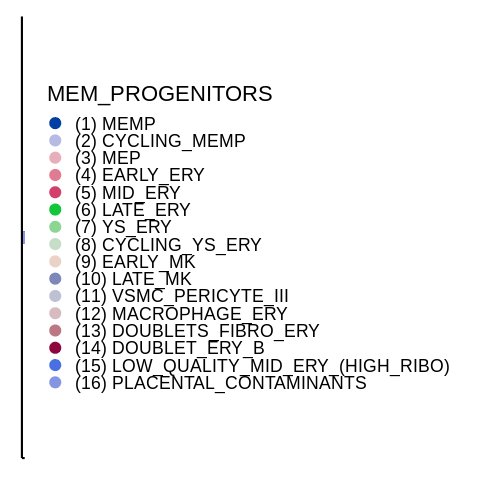

In [54]:
%%R -i anno_order_df -i figdir
library(ggpubr)
anno_order_df$anno_order_labels <- factor(anno_order_df$anno_order_labels, levels=anno_order_df$anno_order_labels)
leg_ls <- lapply(unique(anno_order_df$anno_group), function(g) {
    pl <- anno_order_df %>%
    filter(anno_group==g) %>%
    ggplot(aes(anno_order_labels, 1, color=anno_order_labels)) +
    geom_point(size=5) +
    theme_classic(base_size=22) +
    remove_x_axis() +
    remove_y_axis() +
    scale_color_manual(values=setNames(anno_order_df$anno_color, anno_order_df$anno_order_labels),
                      name=g)
#     leg <- get_legend(pl)
#     leg
    pl
    }
)

(wrap_plots(leg_ls, ncol=2) +
plot_layout(guides='collect') & 
theme(legend.justification = "left") &
guides(color=guide_legend(ncol = 1))) +
ggsave(paste0(figdir, "ery_embedding_legend.pdf"), height=14, width=12)

### Stroma

In [150]:
split="STROMA"

In [151]:
adata = sc.read_h5ad(data_dir + 'PAN.A01.v01.entire_data_normalised_log.{t}.{s}.embedding.h5ad'.format(t=timestamp, s=split), backed="r")
adata.var_names_make_unique()

In [152]:
anno_obs = pd.read_csv(data_dir + "PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv", index_col=0)
anno_obs_lym = anno_obs.loc[adata.obs_names[adata.obs_names.isin(anno_obs.index)]].copy()

In [153]:
anno_obs = anno_obs_lym.copy()
anno_order = list(anno_obs_lym['anno_lvl_2_final_clean'].unique())
anno_order.sort()
anno_group = {split:anno_order}

In [154]:
adata.obs['anno_lvl_2_final_clean'] = np.nan
adata.obs.loc[adata.obs_names.isin(anno_obs_lym.index), 'anno_lvl_2_final_clean'] = anno_obs_lym.loc[adata.obs_names[adata.obs_names.isin(anno_obs_lym.index)]]['anno_lvl_2_final_clean']

In [155]:
anno_numbering = {anno_order[i]:str(i+1) for i in range(len(anno_order))}
adata.obs['anno_number'] = [anno_numbering[x] if x in anno_order else np.nan for x in adata.obs['anno_lvl_2_final_clean']]

saving figure to file /home/jovyan/mount/gdrive/Pan_fetal/writing/ms_figures/draft_panels/assemble_fig2/scvelo_STROMA_annotation_embedding.png


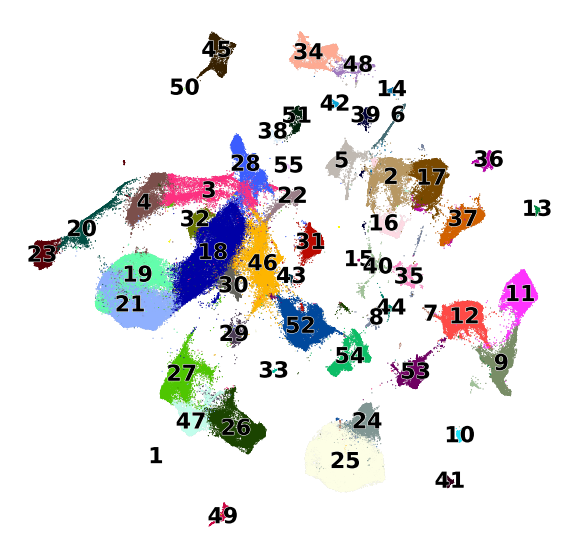

In [156]:
# high_q_numbers = adata.obs['anno_number'][~adata.obs['anno_lvl_2_final_clean'].isin(anno_group_lymphoid['low quality'])].unique().astype("str")

plt.rcParams['figure.figsize'] = [10,10]
scv.pl.umap(adata, color=['anno_number'], 
            title="", legend_fontsize=22, size=5,
#             groups=high_q_numbers,
            save='{s}_annotation_embedding.png'.format(s=split)
           )

Make legend

In [157]:
color_dict = dict(zip(adata.obs['anno_number'].cat.categories, adata.uns['anno_number_colors']))
anno_order_labels = ["({n}) {a}".format(n=str(i+1),a=anno_order[i]) for i in range(len(anno_order))]
anno_number = ["{n}".format(n=str(i+1)) for i in range(len(anno_order))]

anno_order_df = pd.DataFrame([anno_order_labels, anno_order]).T
anno_order_df.columns = ['anno_order_labels', 'anno_lvl_2_final_clean']
anno_order_df['anno_number'] = [anno_numbering[x] for x in anno_order_df['anno_lvl_2_final_clean']]
anno_order_df['anno_color'] = [color_dict[x] for x in anno_order_df['anno_number']]
anno_order_df['anno_group'] = split

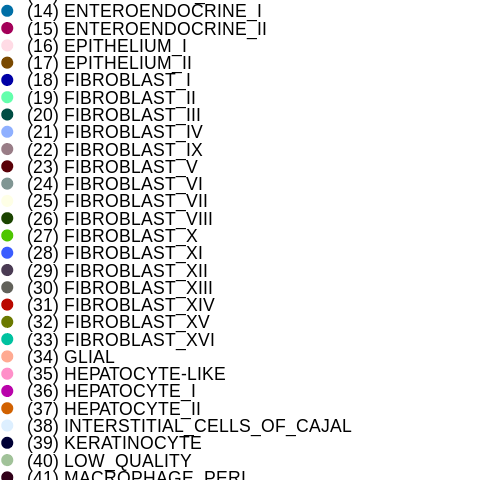

In [158]:
%%R -i anno_order_df 
library(ggpubr)
anno_order_df$anno_order_labels <- factor(anno_order_df$anno_order_labels, levels=anno_order_df$anno_order_labels)
leg_ls <- lapply(unique(anno_order_df$anno_group), function(g) {
    pl <- anno_order_df %>%
    filter(anno_group==g) %>%
    ggplot(aes(anno_order_labels, 1, color=anno_order_labels)) +
    geom_point(size=5) +
    theme_classic(base_size=22) +
    remove_x_axis() +
    remove_y_axis() +
    scale_color_manual(values=setNames(anno_order_df$anno_color, anno_order_df$anno_order_labels),
                      name=g)
#     leg <- get_legend(pl)
#     leg
    pl
    }
)

(wrap_plots(leg_ls, ncol=2) +
plot_layout(guides='collect') & 
theme(legend.justification = "left") &
guides(color=guide_legend(ncol = 1))) +
ggsave(paste0(figdir, "stroma_embedding_legend.pdf"), height=14, width=12)